In [2]:
%pip install sastrawi
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
from collections import OrderedDict
from wordcloud import WordCloud
import seaborn as sns

C:\Users\MUHAMMAD NUR FAZA\AppData\Local\Temp\ipykernel_26072\1924155140.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df_data_abusive = pd.read_csv('./data/abusive.csv')
df_data_kamus = pd.read_csv('./data/new_kamusalay.csv', encoding='latin-1')
df_data = pd.read_csv('./data/data.csv', encoding='latin-1')


In [44]:
abusive_words = df_data_abusive['ABUSIVE'].tolist()

In [96]:
df_data_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [7]:
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


## **Pre-Processing Data**

In [9]:

html_tag = re.compile(r'<.*?>')

http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')

punctuation = re.compile(r'[^\w\s]') 

def data_cleaning(text):
  text = re.sub(html_tag, r'', text)

  text = re.sub(http_link, r'', text)
  text = re.sub(www_link, r'', text)

  text = re.sub(punctuation, r'', text)

  return text

In [10]:
df_data['Tweet'] = df_data['Tweet'].apply(lambda x: data_cleaning(x))
df_data['Tweet'] = df_data['Tweet'].apply(lambda x: str(x).lower())

df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,rt user user siapa yang telat ngasih tau elued...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,user user aku itu akunnku tau matamu sipit tap...,0,0,0,0,0,0,0,0,0,0,0,0
4,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [11]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df_data['tweet_after_stem'] = df_data['Tweet'].apply(lambda x: stemmer.stem(x))
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_after_stem
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,saat semua cowok usaha lacak perhati gue loe l...
1,rt user user siapa yang telat ngasih tau elued...,0,1,0,0,0,0,0,0,0,0,0,0,rt user user siapa yang telat ngasih tau elued...
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...
3,user user aku itu akunnku tau matamu sipit tap...,0,0,0,0,0,0,0,0,0,0,0,0,user user aku itu akunnku tau mata sipit tapi ...
4,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,user user kaum cebong kapir udah liat dongok d...


In [27]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

df_data['tweet_stp'] = df_data['tweet_after_stem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_after_stem,tweet_stp
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,saat semua cowok usaha lacak perhati gue loe l...,semua cowok usaha lacak perhati gue loe lanta...
1,rt user user siapa yang telat ngasih tau elued...,0,1,0,0,0,0,0,0,0,0,0,0,rt user user siapa yang telat ngasih tau elued...,rt user user siapa telat ngasih tau eluedan s...
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...,41 kadang aku berfikir aku tetap percaya tuh...
3,user user aku itu akunnku tau matamu sipit tap...,0,0,0,0,0,0,0,0,0,0,0,0,user user aku itu akunnku tau mata sipit tapi ...,user user aku akunnku tau mata sipit liat m...
4,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,user user kaum cebong kapir udah liat dongok d...,user user kaum cebong kapir udah liat dongok ...


## EDA

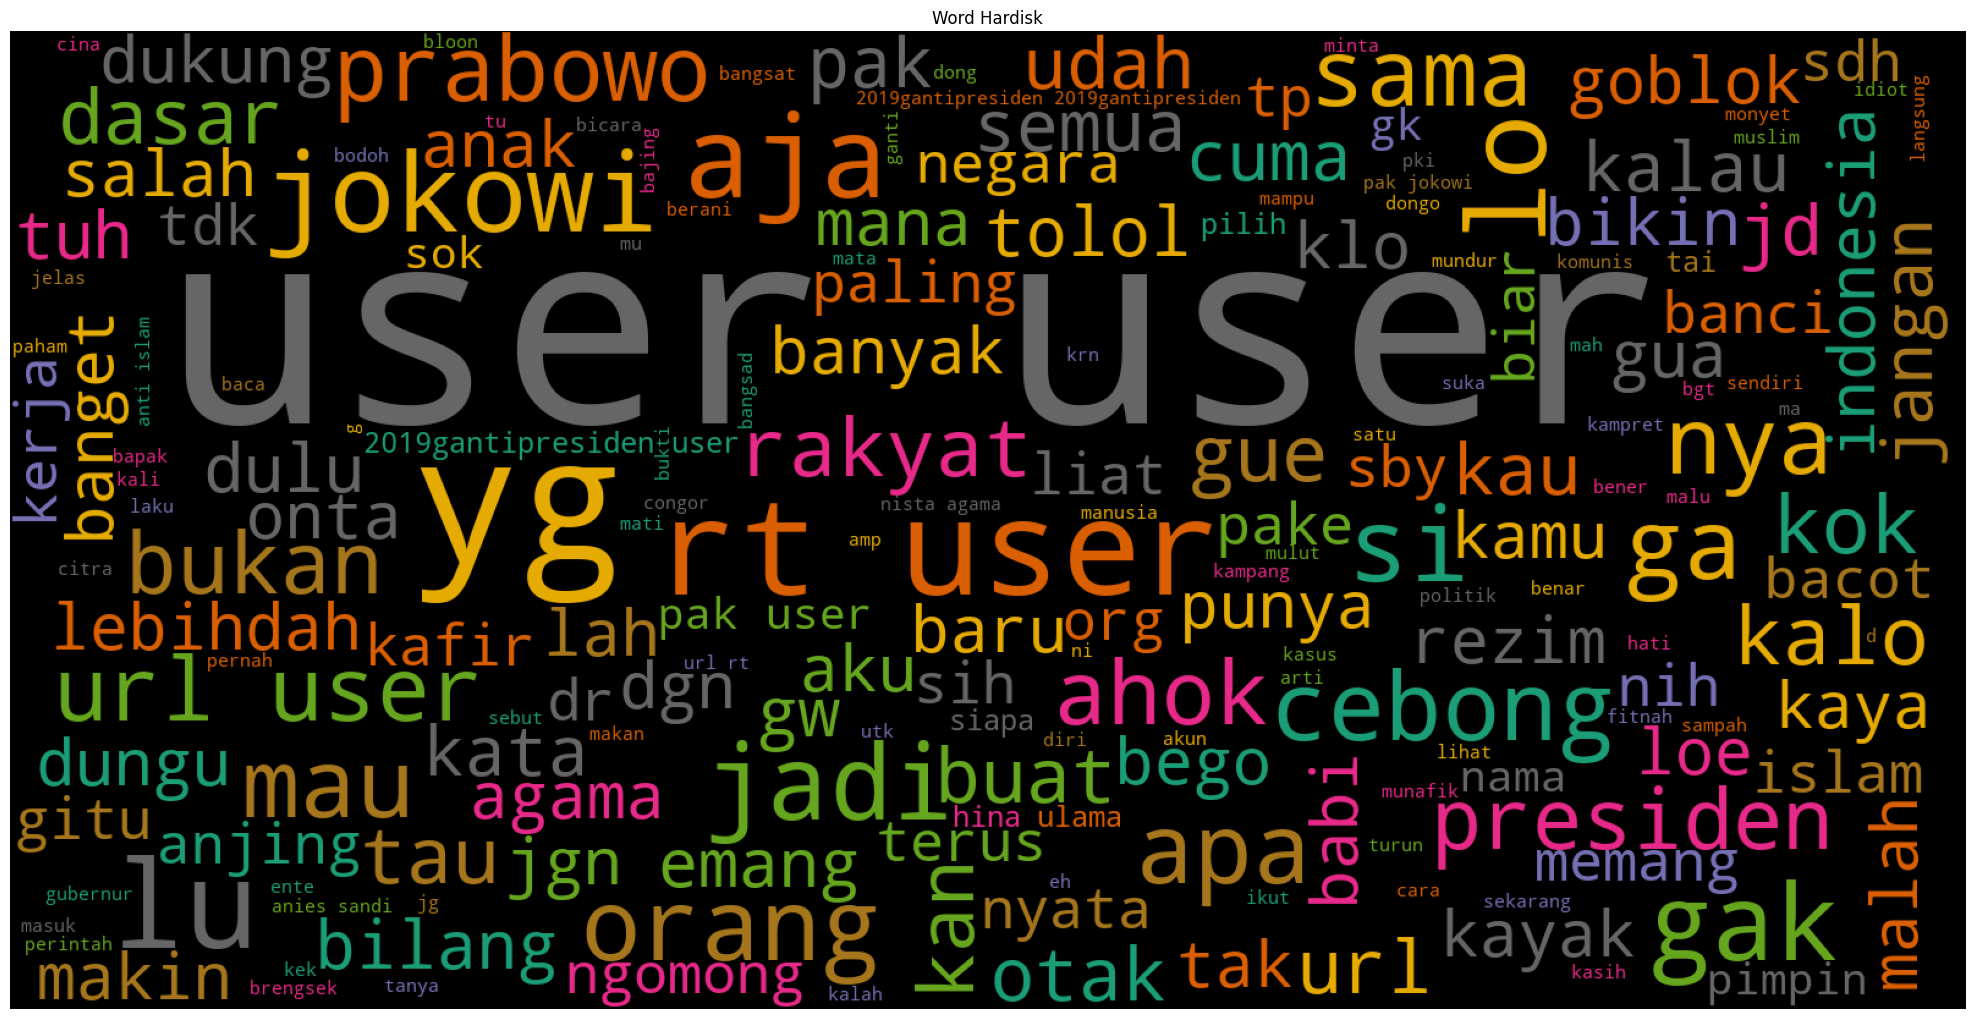

In [28]:
data_weak = df_data.loc[(df_data['HS_Weak'] == 1)]
word_weak = pd.Series(' '.join(data_weak['tweet_stp']).split())
text_weak = ' '.join(word_weak)

wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_weak)
plt.figure(figsize=(20,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

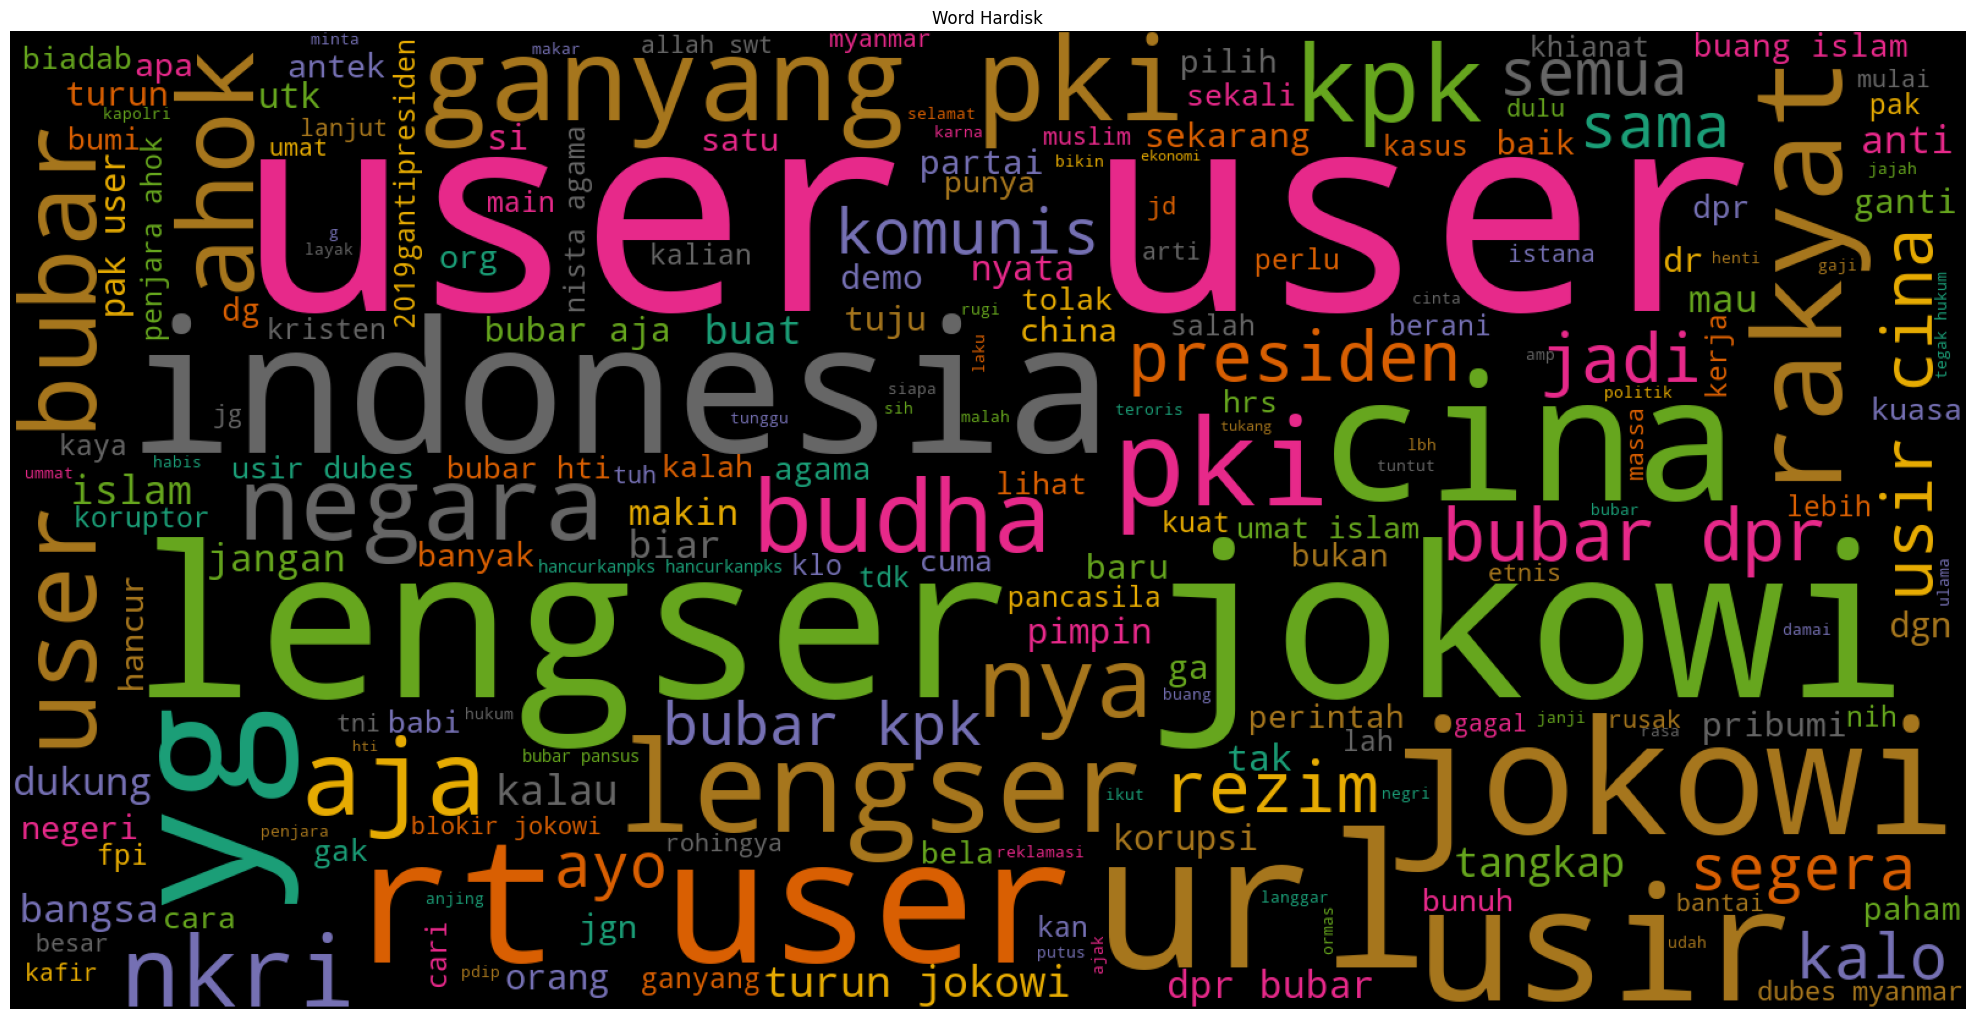

In [30]:
data_strong = df_data.loc[(df_data['HS_Strong'] == 1)]
word_strong = pd.Series(' '.join(data_strong['tweet_stp']).split())
text_strong = ' '.join(word_strong)

wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_strong)
plt.figure(figsize=(20,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
stopped_words = ['user', 'yg', 'lu', 'lo', 'rt', 'aja', 'url', 'aku']
re_str = r"\b(?:{})\b".format("|".join(stopped_words))
df_data['tweet_stp'] = df_data['tweet_stp'].str.replace(re_str, '', regex=True)
df_data['tweet_stp'] = df_data['tweet_stp'].str.strip()
df_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_after_stem,tweet_stp
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,saat semua cowok usaha lacak perhati gue loe l...,semua cowok usaha lacak perhati gue loe lantas...
1,rt user user siapa yang telat ngasih tau elued...,0,1,0,0,0,0,0,0,0,0,0,0,rt user user siapa yang telat ngasih tau elued...,siapa telat ngasih tau eluedan sarap gue gaul...
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berfikir kenapa aku tetap percay...,41 kadang berfikir tetap percaya tuhan pad...
3,user user aku itu akunnku tau matamu sipit tap...,0,0,0,0,0,0,0,0,0,0,0,0,user user aku itu akunnku tau mata sipit tapi ...,akunnku tau mata sipit liat mana
4,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,user user kaum cebong kapir udah liat dongok d...,kaum cebong kapir udah liat dongok awal tamba...


## Visualization

In [82]:
strong_HS_data = df_data[df_data['HS_Strong']== 1]
weak_HS_data = df_data[df_data['HS_Weak']== 1]
abusive_data = df_data[df_data['Abusive']== 1]

# Filter out hate speech data
filtered_strong_HS_data = strong_HS_data[~strong_HS_data["tweet_stp"].str.contains('|'.join(abusive_words), case=False)]
filtered_weak_HS_data = weak_HS_data[~weak_HS_data["tweet_stp"].str.contains('|'.join(abusive_words), case=False)]

filtered_strong_individual_HS_data = filtered_strong_HS_data[filtered_strong_HS_data["HS_Individual"]== 1]
filtered_weak_individual_HS_data = filtered_weak_HS_data[filtered_weak_HS_data["HS_Individual"]== 1]

filtered_strong_group_HS_data = filtered_strong_HS_data[filtered_strong_HS_data["HS_Group"]== 1]
filtered_weak_group_HS_data = filtered_weak_HS_data[filtered_weak_HS_data["HS_Group"]== 1]

filtered_strong_religion_HS_data = filtered_strong_HS_data[filtered_strong_HS_data["HS_Religion"]== 1]
filtered_weak_religion_HS_data = filtered_weak_HS_data[filtered_weak_HS_data["HS_Religion"]== 1]

# Counting and showing top words for each data
count_word_abusive = abusive_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_abusive = count_word_abusive.nlargest(12)

count_word_strong = filtered_strong_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_strong = count_word_strong.nlargest(12)

count_word_weak = filtered_weak_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_weak = count_word_weak.nlargest(12)

count_word_strong_individual = filtered_strong_individual_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_strong_individual = count_word_strong_individual.nlargest(12)

count_word_weak_individual = filtered_weak_individual_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_weak_individual = count_word_weak_individual.nlargest(12)

count_word_strong_group = filtered_strong_group_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_strong_group = count_word_strong_group.nlargest(12)

count_word_weak_group = filtered_weak_group_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_weak_group = count_word_weak_group.nlargest(12)

count_word_strong_religion = filtered_strong_religion_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_strong_religion = count_word_strong_religion.nlargest(12)

count_word_weak_religion = filtered_weak_religion_HS_data["tweet_stp"].str.findall(r"(\w+)").explode().value_counts()
top_12_weak_religion = count_word_weak_religion.nlargest(12)

In [97]:
filtered_strong_individual_HS_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_after_stem,tweet_stp
134,user user user user user user user user bangke...,1,1,1,0,0,0,0,0,1,0,0,1,user user user user user user user user bangke...,bangke hajar
1173,ahok harus tamat penjarakan ahok penjarakan ahok,1,0,1,0,0,0,0,0,1,0,0,1,ahok harus tamat penjara ahok penjara ahok,ahok tamat penjara ahok penjara ahok
1183,apapun masalah nya muara nya tanggung jawab p...,1,0,1,0,0,0,0,0,1,0,0,1,apa masalah nya muara nya tanggung jawab presi...,apa masalah nya muara nya tanggung jawab presi...
1705,coba kalo prabowosampe level ob aja bakal dise...,1,0,1,0,0,0,0,0,1,0,0,1,coba kalo prabowosampe level ob aja bakal sebu...,coba kalo prabowosampe level ob bakal sebut p...
2201,ulang lagi reformasi 98 jilid 2 user turunkan ...,1,0,1,0,0,0,0,0,1,0,0,1,ulang lagi reformasi 98 jilid 2 user turun jokowi,ulang reformasi 98 jilid 2 turun jokowi
2381,ahok cari cari celah untuk serang para saksi ...,1,0,1,0,0,0,0,0,1,0,0,1,ahok cari cari celah untuk serang para saksi d...,ahok cari cari celah serang saksi dramaahokd...
2537,rt user usir aja duta besarnya negara yg krist...,1,0,1,0,1,0,0,0,0,0,0,1,rt user usir aja duta besar negara yg kristen ...,usir duta besar negara kristen udah putus h...
2792,user ngancem pembunuhan itu gak bakalan pernah...,1,1,1,0,0,0,0,0,1,0,0,1,user ngancem bunuh itu gak bakal pernah lucu m...,ngancem bunuh gak bakal pernah lucu mana dia...
2866,pensiunkan kapolri user user url,1,0,1,0,0,0,0,0,1,0,0,1,pensiun kapolri user user url,pensiun kapolri
2941,kemaren di siantar di copot spanduk mu sekaran...,1,0,1,0,0,0,0,0,1,0,0,1,kemaren di siantar di copot spanduk mu sekaran...,kemaren siantar copot spanduk mu sekarang cu...


In [98]:
filtered_strong_group_HS_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_after_stem,tweet_stp
122,cina perusak bangsa usir stuju,1,0,0,1,0,1,0,0,0,0,0,1,cina usak bangsa usir stuju,cina usak bangsa usir stuju
246,user pak user mahfud md sudah berpaling dari a...,1,1,0,1,1,0,0,0,0,0,0,1,user pak user mahfud md sudah paling dari alla...,pak mahfud md paling allah swt berang bang...
300,bubarkan hti amp fpi url,1,0,0,1,1,0,0,0,0,0,0,1,bubar hti amp fpi url,bubar hti amp fpi
312,penjajahan di atas bumi indonesia harus di hap...,1,0,0,1,0,1,0,0,0,0,0,1,jajah di atas bumi indonesia harus di hapus ka...,jajah atas bumi indonesia hapus kan jajah e...
366,user bubarin nkri harga mati,1,0,0,1,0,0,0,0,1,0,0,1,user bubarin nkri harga mati,bubarin nkri harga mati
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12868,terus ganyang pki url,1,0,0,1,0,1,0,0,0,0,0,1,terus ganyang pki url,terus ganyang pki
12971,allahu akbar gaduh karena ahok rakyat bersama ...,1,0,0,1,0,0,0,0,1,0,0,1,allahu akbar gaduh karena ahok rakyat sama fpi...,allahu akbar gaduh ahok rakyat sama fpi bubar...
13060,user user user kpk bubarkan saja ga ada manfaa...,1,0,0,1,0,0,0,0,1,0,0,1,user user user kpk bubar saja ga ada manfaat h...,kpk bubar ga manfaat buang uang rakyat ngur...
13101,user bubarkan hti yg ditangkap kpk,1,0,0,1,1,0,0,0,0,0,0,1,user bubar hti yg tangkap kpk,bubar hti tangkap kpk


In [99]:
filtered_strong_religion_HS_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_after_stem,tweet_stp
246,user pak user mahfud md sudah berpaling dari a...,1,1,0,1,1,0,0,0,0,0,0,1,user pak user mahfud md sudah paling dari alla...,pak mahfud md paling allah swt berang bang...
300,bubarkan hti amp fpi url,1,0,0,1,1,0,0,0,0,0,0,1,bubar hti amp fpi url,bubar hti amp fpi
510,kita balas di sini gima kita usir budha user k...,1,0,0,1,1,0,0,0,0,0,0,1,kita balas di sini gima kita usir budha user k...,balas sini gima usir budha kurang ajar etni...
833,user pak user membuang islam bisa jadi menyaki...,1,0,0,1,1,0,0,0,0,0,0,1,user pak user buang islam bisa jadi sakit tapi...,pak buang islam jadi sakit laku baik semu...
2118,apakah ini beradab jika setuju tidak beradab b...,1,1,0,1,1,0,0,0,0,0,0,1,apakah ini adab jika tuju tidak adab buang isl...,adab tuju adab buang islam dgn buang islam...
2512,usir budha dari tanah jawa,1,0,0,1,1,0,0,0,0,0,0,1,usir budha dari tanah jawa,usir budha tanah jawa
2537,rt user usir aja duta besarnya negara yg krist...,1,0,1,0,1,0,0,0,0,0,0,1,rt user usir aja duta besar negara yg kristen ...,usir duta besar negara kristen udah putus h...
2945,kita harus melawan usir dubes nyanmar boikot s...,1,0,0,1,1,1,0,0,0,0,0,1,kita harus lawan usir dubes nyanmar boikot seg...,lawan usir dubes nyanmar boikot segala urus dg...
3070,19pemimpindarimasjid adalah pemimpin yg dapat ...,1,0,0,1,1,0,0,0,0,0,0,1,19pemimpindarimasjid adalah pimpin yg dapat aj...,19pemimpindarimasjid pimpin ajak jalan sy...
4199,user bubarkan hti tolak faham khilafah,1,0,0,1,1,0,0,0,0,0,0,1,user bubar hti tolak faham khilafah,bubar hti tolak faham khilafah


## Abusive words count for weak and strong hate speeches

In [72]:
fig = px.histogram(filtered_strong_HS_data, x="Abusive", color="HS_Strong", title="Strong hate speech with abusive words")
fig.show()

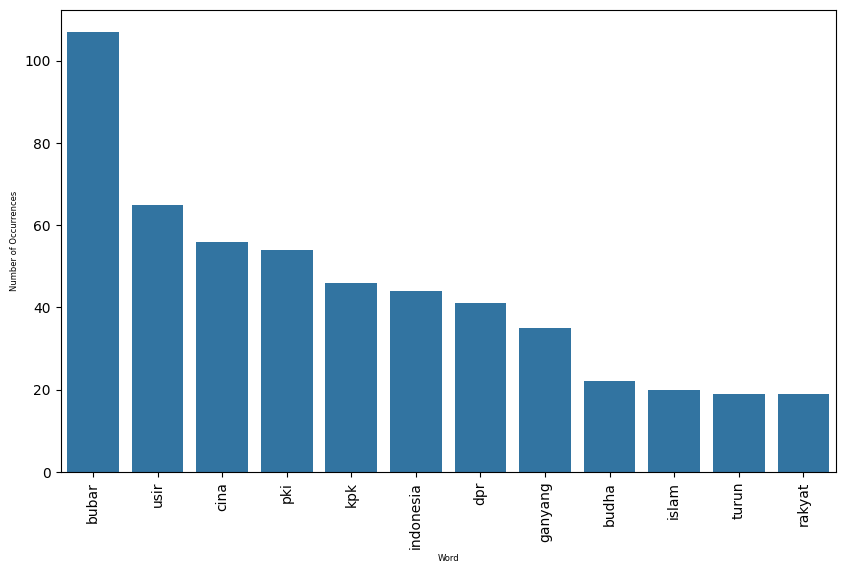

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_strong.index, y=top_12_strong.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

In [57]:
fig = px.histogram(filtered_weak_HS_data, x="Abusive", color="HS_Weak", title="Weak hate speech with abusive words")
fig.show()

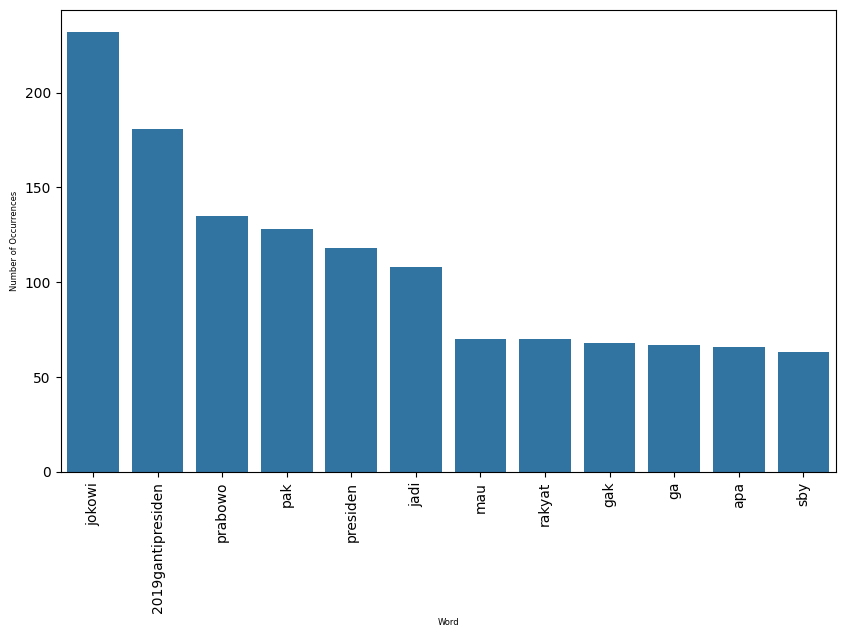

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_weak.index, y=top_12_weak.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

## Strong Hate Speeches that Contains Individuals

In [101]:
fig = px.histogram(filtered_strong_HS_data, x="HS_Individual", color="HS_Strong", title="Strong hate speech with abusive words in individuals")
fig.show()

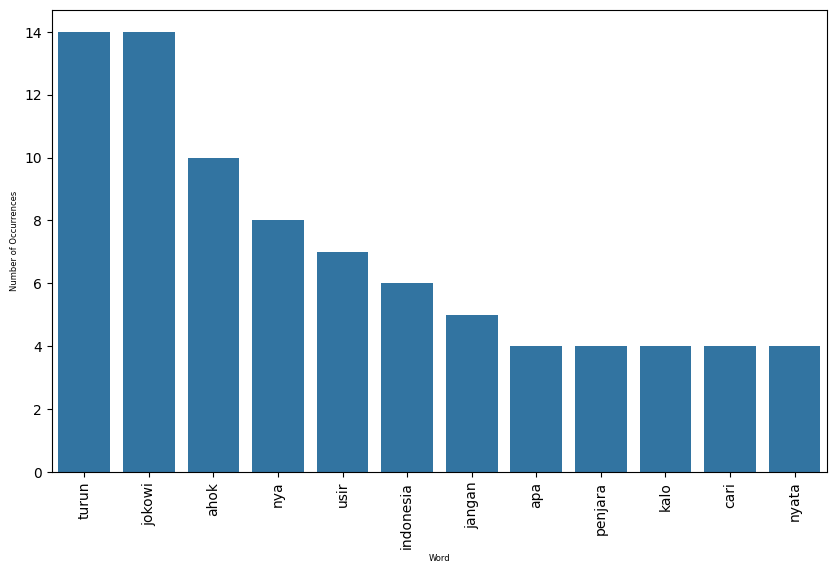

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_strong_individual.index, y=top_12_strong_individual.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

In [92]:
fig = px.histogram(filtered_weak_HS_data, x="HS_Individual", color="HS_Weak", title="Weak hate speech with abusive words in individuals")
fig.show()

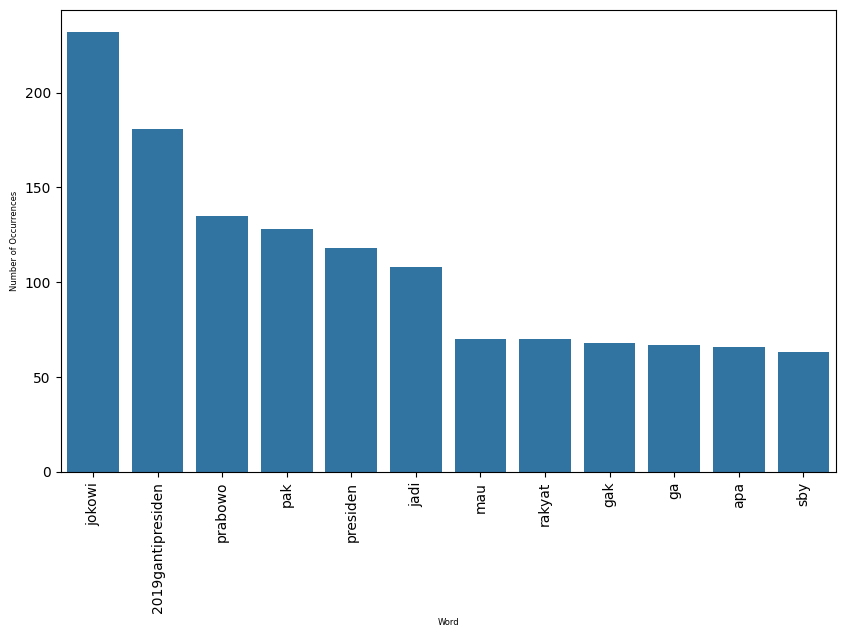

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_weak_individual.index, y=top_12_weak_individual.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

In [93]:
fig = px.histogram(filtered_strong_HS_data, x="HS_Group", color="HS_Strong", title="Strong hate speech with abusive words in groups")
fig.show()

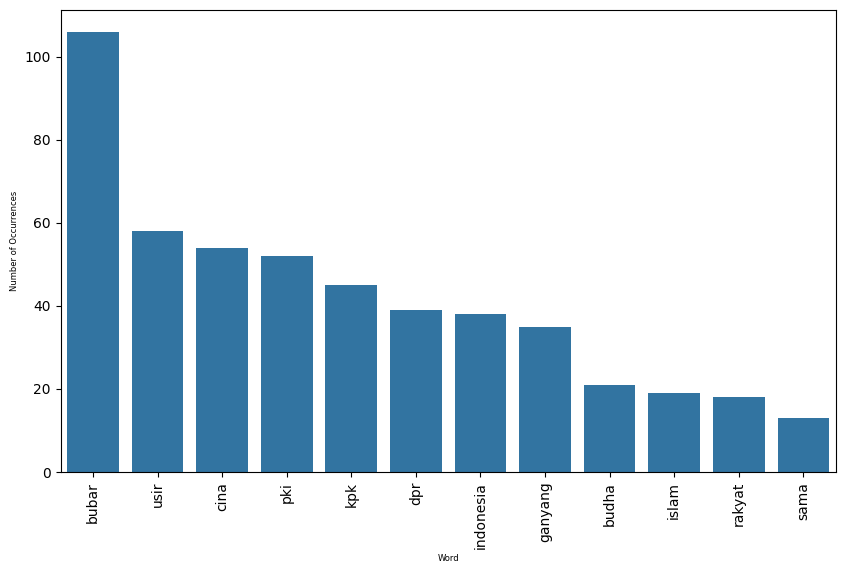

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_strong_group.index, y=top_12_strong_group.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

In [94]:
fig = px.histogram(filtered_weak_HS_data, x="HS_Group", color="HS_Weak", title="Weak hate speech with abusive words in groups")
fig.show()

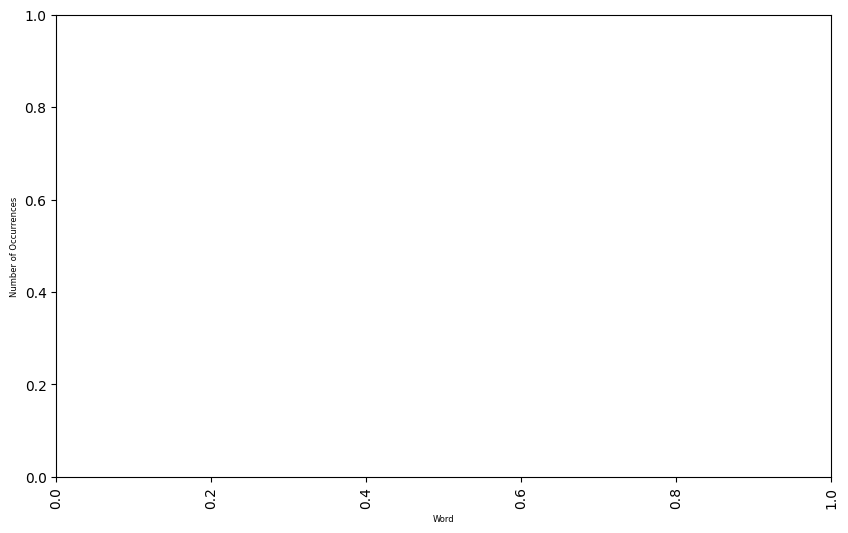

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_weak_group.index, y=top_12_weak_group.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

In [89]:
fig = px.histogram(filtered_strong_HS_data, x="HS_Religion", color="HS_Strong", title="Strong hate speech with abusive words in religion")
fig.show()

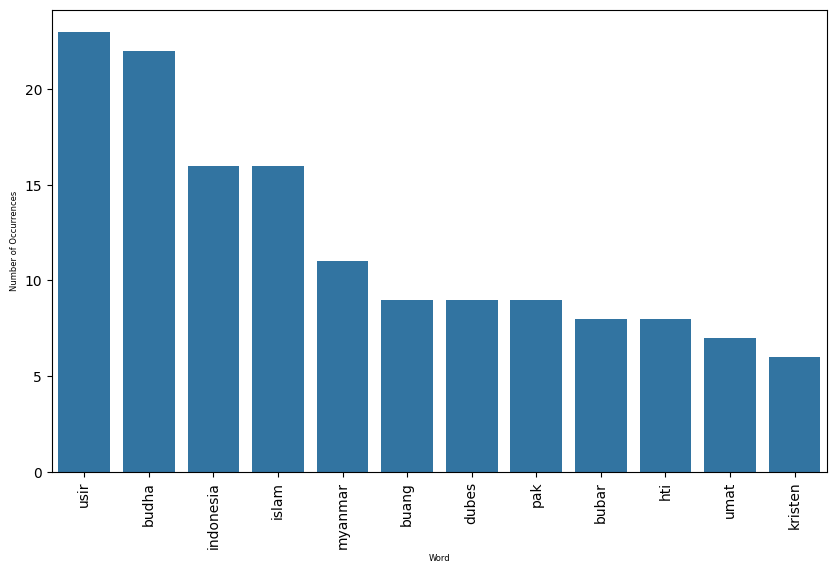

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_strong_religion.index, y=top_12_strong_religion.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)

In [95]:
fig = px.histogram(filtered_weak_HS_data, x="HS_Religion", color="HS_Weak", title="Weak hate speech with abusive words in religion")
fig.show()

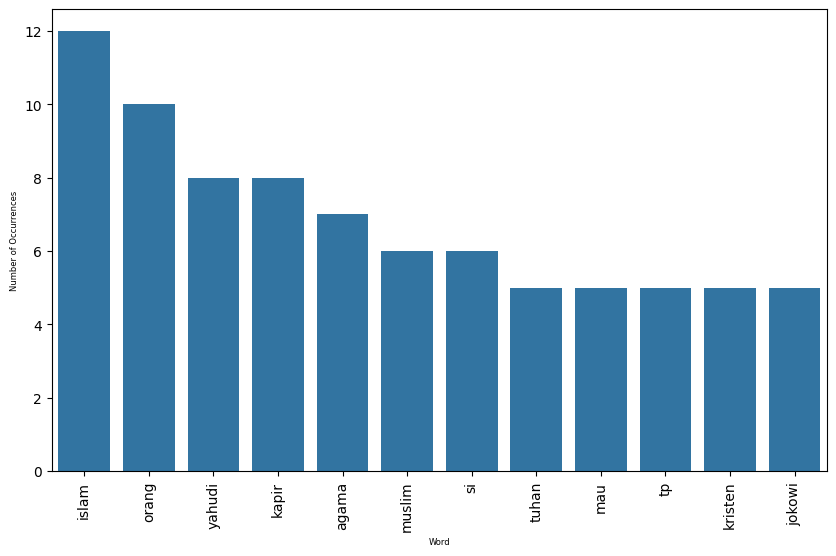

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_12_weak_religion.index, y=top_12_weak_religion.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=6)
ax.set_xlabel('Word', fontsize=6)
ax.xaxis.set_tick_params(rotation=90)